<a href="https://colab.research.google.com/github/mohammadAliMkh/Tensorflow/blob/main/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.datasets import fashion_mnist

In [94]:
(train_data , train_label) , (test_data , test_label) = fashion_mnist.load_data()

In [95]:
targets = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Ankle boot')

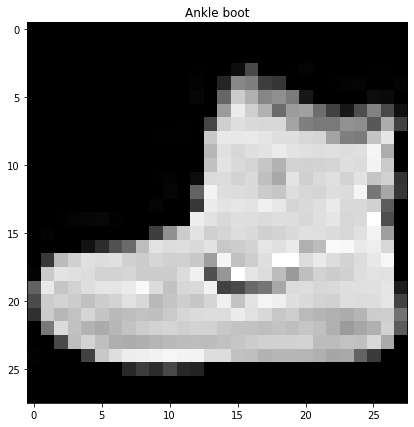

In [96]:
plt.figure(figsize = (10 , 7))
plt.imshow(train_data[0] , cmap = "gray")
plt.title(targets[train_label[0]])

In [97]:
a = np.random.randint(0 , 100 , size = [1])
a

array([92])

In [98]:
def plot_random_fashion_mnist(data, label, number_of_images = 16):
  '''this method will plot some fashoin mnist images randomly
  '''

  plt.figure(figsize = (10 , 7))

  for i in range(number_of_images):

    plt.subplot(4 , 4 , i + 1)

    rand = np.random.randint(0 , len(data) , size = [1])

    plt.imshow(np.squeeze(data[rand] , axis = 0), cmap = "gray")
    plt.title(targets[int(label[rand])])
    plt.subplots_adjust(right=1.5)
    plt.subplots_adjust(top=2)

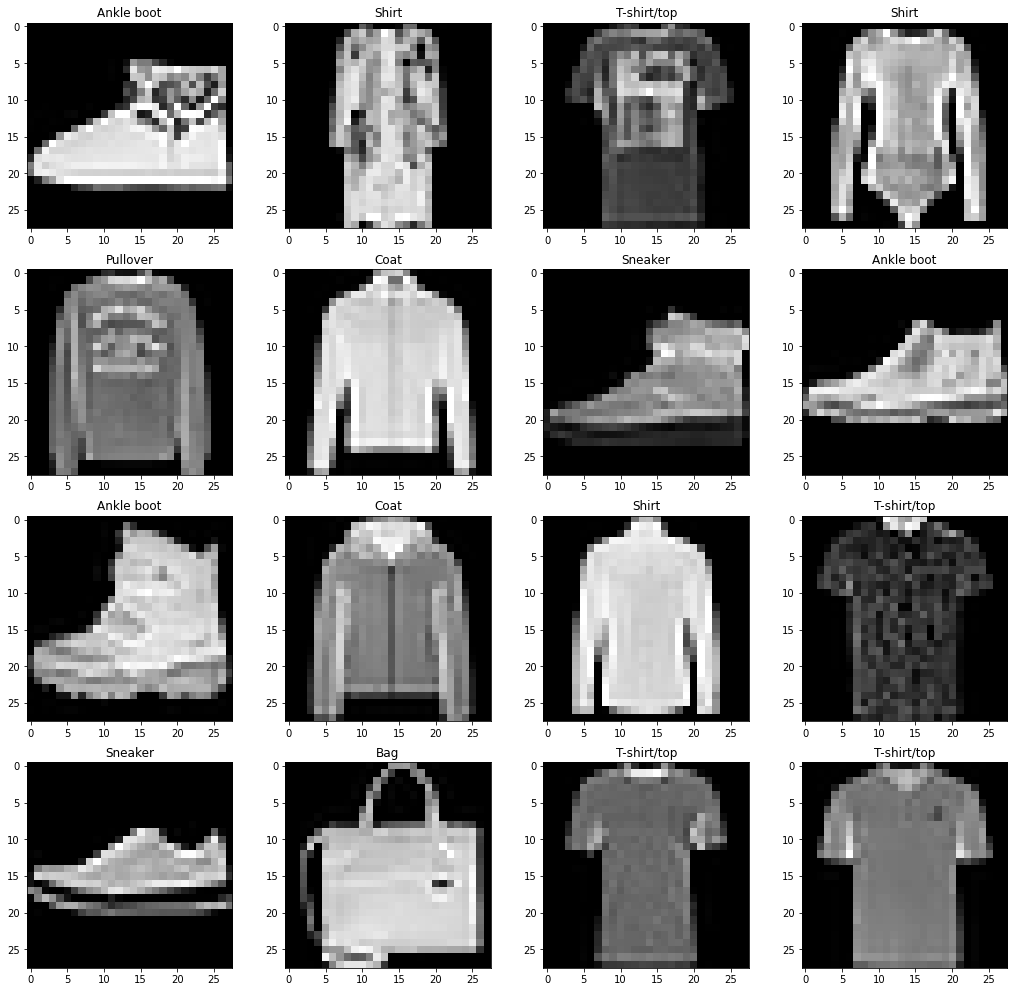

In [99]:
plot_random_fashion_mnist(train_data , train_label)

In [100]:
train_label_onehot = tf.keras.utils.to_categorical(train_label , num_classes = 10)

In [101]:
test_label_onehot = tf.keras.utils.to_categorical(test_label , num_classes = 10)

In [102]:
model0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (28 , 28) , name = "input_layer"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
] , name = "model0")

In [103]:
model0.compile(loss = "categorical_crossentropy" , optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) , metrics = ["acc"])

In [104]:
history0 = model0.fit(train_data , train_label_onehot , epochs = 5 , validation_data = (test_data , test_label_onehot))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.1987 - acc: 0.6730 - val_loss: 0.7727 - val_acc: 0.7373
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6762 - acc: 0.7584 - val_loss: 0.6553 - val_acc: 0.7781
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5652 - acc: 0.7992 - val_loss: 0.6244 - val_acc: 0.7767
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5304 - acc: 0.8149 - val_loss: 0.5682 - val_acc: 0.8097
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5105 - acc: 0.8218 - val_loss: 0.5809 - val_acc: 0.8083


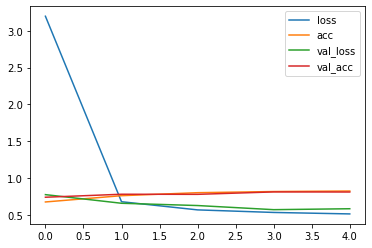

In [105]:
pd.DataFrame(history0.history).plot()

In [106]:
preds = model0.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [107]:
def calculate_accuracy(preds , labels):
  '''calculate accuracy in Tensorflow
  '''

  all_data_lenght = len(labels)

  if len(preds.shape) > 1:
    preds = tf.argmax(tf.round(preds) , axis = 1).numpy()
    labels = tf.argmax(tf.round(labels) , axis = 1).numpy()
  
  number_of_correct_predictions = tf.unique_with_counts(tf.equal(preds , labels)).count.numpy()[0]

  accuracy = (number_of_correct_predictions / all_data_lenght) * 100

  return accuracy

In [108]:
calculate_accuracy(preds , test_label_onehot)

77.75

In [109]:
x_train = tf.data.Dataset.from_tensor_slices(train_data).batch(32).prefetch(tf.data.AUTOTUNE)
y_train = tf.data.Dataset.from_tensor_slices(train_label_onehot).batch(32).prefetch(tf.data.AUTOTUNE)
train = tf.data.Dataset.zip((x_train , y_train))
train

<ZipDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [110]:
x_test = tf.data.Dataset.from_tensor_slices(test_data).batch(32).prefetch(tf.data.AUTOTUNE)
y_test = tf.data.Dataset.from_tensor_slices(test_label_onehot).batch(32).prefetch(tf.data.AUTOTUNE)
test = tf.data.Dataset.zip((x_test , y_test))
test

<ZipDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [111]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28 , 28 , 1] , name = "input_layer"),
    tf.keras.layers.Conv2D(filters = 10 , kernel_size = 3 , strides = 1 , padding = "valid" , activation = "relu"),

    tf.keras.layers.Conv2D(filters = 10 , kernel_size = 3 , strides = 1 , padding = "valid" , activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Conv2D(filters = 10 , kernel_size = 3 , strides = 1 , padding = "valid" , activation = "relu"),

    tf.keras.layers.Conv2D(filters = 10 , kernel_size = 3 , strides = 1 , padding = "valid" , activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
])

In [112]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 10)         0         
 g2D)                                                 

In [113]:
model1.compile(loss = "categorical_crossentropy" , optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) , metrics = ["acc"])

In [114]:
history1 = model1.fit(train , epochs = 5 , validation_data = test)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6641 - acc: 0.7789 - val_loss: 0.5087 - val_acc: 0.8131
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4264 - acc: 0.8435 - val_loss: 0.4282 - val_acc: 0.8471
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3761 - acc: 0.8618 - val_loss: 0.3987 - val_acc: 0.8540
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3438 - acc: 0.8728 - val_loss: 0.3747 - val_acc: 0.8646
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3213 - acc: 0.8798 - val_loss: 0.3730 - val_acc: 0.8620


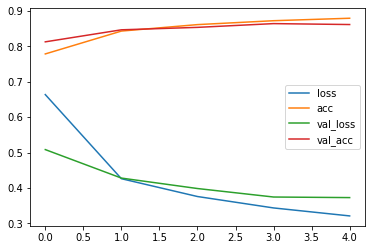

In [115]:
pd.DataFrame(history1.history).plot()

In [116]:
model1_preds = model1.predict(test)

313/313 [==============================] - 1s 2ms/step


In [117]:
calculate_accuracy(model1_preds , test_label_onehot)

84.42

In [118]:
import requests
from pathlib import Path
import os

root = Path.cwd()
file_dir = root / "helper_functions.py"

if Path.exists(file_dir):
  print("File Already Exists...")
else:
  with open("/content/helper_functions.py" , "wb") as f:
    r = requests.get("https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py")
    f.write(r.content)

File Already Exists...


In [119]:
from helper_functions import make_confusion_matrix

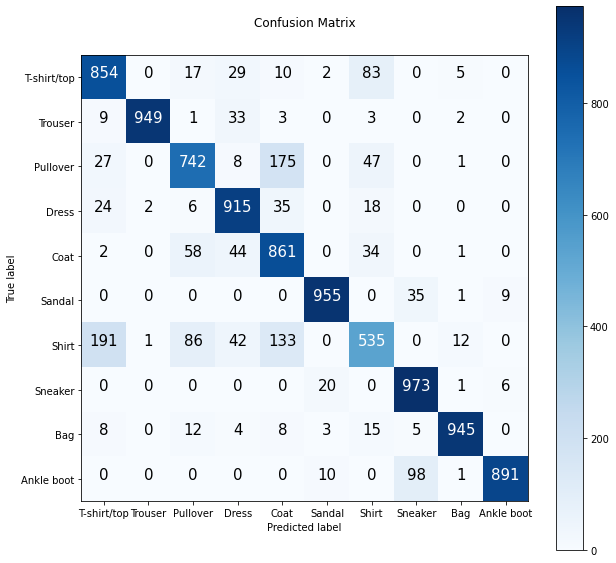

In [121]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

make_confusion_matrix(test_label , tf.argmax(model1_preds , axis = 1).numpy() , classes = targets , figsize = (10 , 10))